In [1]:
from linares_plot import *
import os
import statsmodels.api as sm
from joblib import Parallel, delayed
import multiprocessing
from scipy.optimize import curve_fit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import random


In [2]:
def heatmap(data, title, dist_time='None', fs1=20, fs2=12):
    ax = sns.heatmap(data,vmin=50, vmax=100, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 70, 90], 'label': 'decoding error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    plt.gca().set_title(title, fontsize=fs1)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([-500,0,500,1000,1500])
    plt.gca().set_ylim(0,24)
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([-500,0,500,1000,1500])
    plt.xticks(fontsize=fs2, rotation=0)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('training time (ms)', fontsize=fs1, labelpad=12)
    plt.gca().set_xlabel('testing time (ms)', fontsize=fs1, labelpad=12)
    ##### Target presented at 500ms
    ##### Stimulus duration: 100ms
    ##### Distractor presented with different SOA
    plt.plot([500/100, 500/100], [23,23], markersize=10, color='y', marker='v')
    if dist_time != 'None':
        plt.plot([(600+dist_time)/100, (600+dist_time)/100], [23,23], markersize=10, color='r', marker='v')
                
    
    plt.show(block=False)


In [3]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD'

In [4]:
heatmaps_pfc_100=[]

path_load = os.path.join(path_CTD, 'hm_pfc_100.xlsx')
xl = pd.ExcelFile(path_load)
pfc_100_neurons = xl.sheet_names 

for n in pfc_100_neurons:
    heatmaps_pfc_100.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

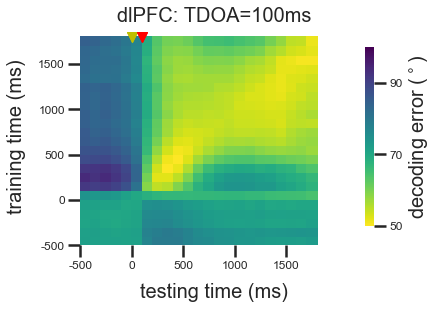

In [5]:
H = [pd.DataFrame(heatmaps_pfc_100[x]) for x in range(len(heatmaps_pfc_100))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'dlPFC: TDOA=' +str(100)+'ms', dist_time=0)

In [6]:
heatmaps_pfc_200=[]

path_load = os.path.join(path_CTD, 'hm_pfc_200.xlsx')
xl = pd.ExcelFile(path_load)
pfc_200_neurons = xl.sheet_names 

for n in pfc_200_neurons:
    heatmaps_pfc_200.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

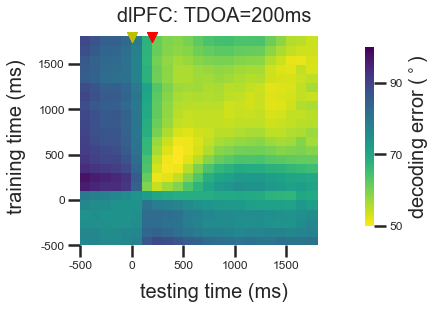

In [7]:
H = [pd.DataFrame(heatmaps_pfc_200[x]) for x in range(len(heatmaps_pfc_200))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'dlPFC: TDOA=' +str(200)+'ms', dist_time=100)

In [8]:
heatmaps_pfc_300=[]

path_load = os.path.join(path_CTD, 'hm_pfc_300.xlsx')
xl = pd.ExcelFile(path_load)
pfc_300_neurons = xl.sheet_names 

for n in pfc_300_neurons:
    heatmaps_pfc_300.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

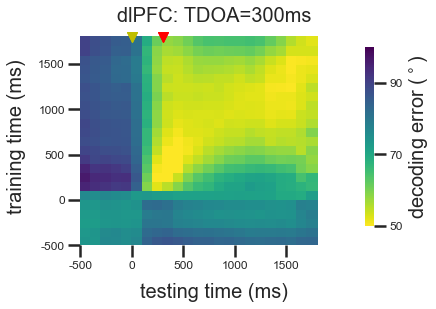

In [9]:
H = [pd.DataFrame(heatmaps_pfc_300[x]) for x in range(len(heatmaps_pfc_300))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'dlPFC: TDOA=' +str(300)+'ms', dist_time=200)

In [10]:
heatmaps_pfc_900=[]

path_load = os.path.join(path_CTD, 'hm_pfc_900.xlsx')
xl = pd.ExcelFile(path_load)
pfc_900_neurons = xl.sheet_names 

for n in pfc_900_neurons:
    heatmaps_pfc_900.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

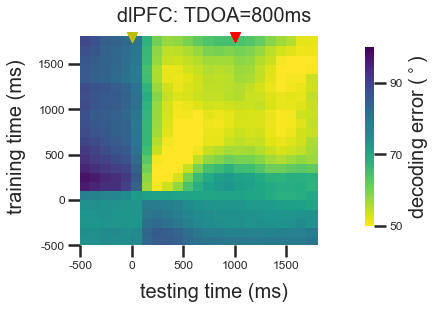

In [11]:
H = [pd.DataFrame(heatmaps_pfc_900[x]) for x in range(len(heatmaps_pfc_900))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'dlPFC: TDOA=' +str(800)+'ms', dist_time=900)

In [12]:
heatmaps_lip_100=[]

path_load = os.path.join(path_CTD, 'hm_lip_100.xlsx')
xl = pd.ExcelFile(path_load)
lip_100_neurons = xl.sheet_names 

for n in lip_100_neurons:
    heatmaps_lip_100.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

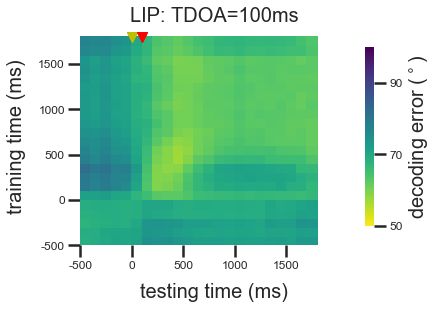

In [13]:
H = [pd.DataFrame(heatmaps_lip_100[x]) for x in range(len(heatmaps_lip_100))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'LIP: TDOA=' +str(100)+'ms', dist_time=0)

In [14]:
heatmaps_lip_200=[]

path_load = os.path.join(path_CTD, 'hm_lip_200.xlsx')
xl = pd.ExcelFile(path_load)
lip_200_neurons = xl.sheet_names 

for n in lip_200_neurons:
    heatmaps_lip_200.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

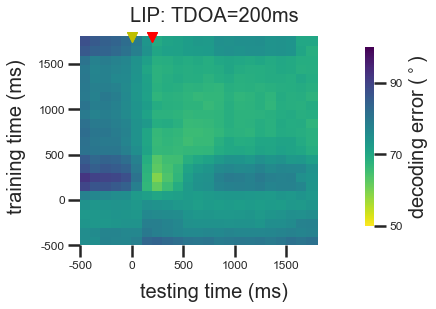

In [15]:
H = [pd.DataFrame(heatmaps_lip_200[x]) for x in range(len(heatmaps_lip_200))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'LIP: TDOA=' +str(200)+'ms', dist_time=100)

In [16]:
heatmaps_lip_300=[]

path_load = os.path.join(path_CTD, 'hm_lip_300.xlsx')
xl = pd.ExcelFile(path_load)
lip_300_neurons = xl.sheet_names 

for n in lip_300_neurons:
    heatmaps_lip_300.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

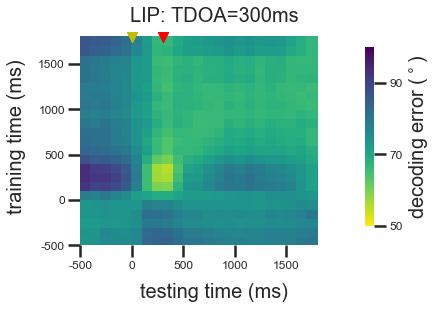

In [17]:
H = [pd.DataFrame(heatmaps_lip_300[x]) for x in range(len(heatmaps_lip_300))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'LIP: TDOA=' +str(300)+'ms', dist_time=200)

In [18]:
heatmaps_lip_900=[]

path_load = os.path.join(path_CTD, 'hm_lip_900.xlsx')
xl = pd.ExcelFile(path_load)
lip_900_neurons = xl.sheet_names 

for n in lip_900_neurons:
    heatmaps_lip_900.append( pd.read_excel(path_load, sheet_name=n).iloc[:,1:].values )

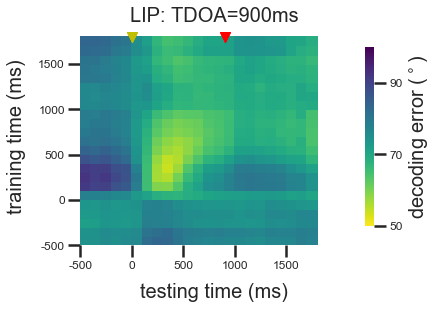

In [19]:
H = [pd.DataFrame(heatmaps_lip_900[x]) for x in range(len(heatmaps_lip_900))]
H_mean = pd.concat(H).groupby(level=0).mean()
heatmap(H_mean, 'LIP: TDOA=' +str(900)+'ms', dist_time=800)

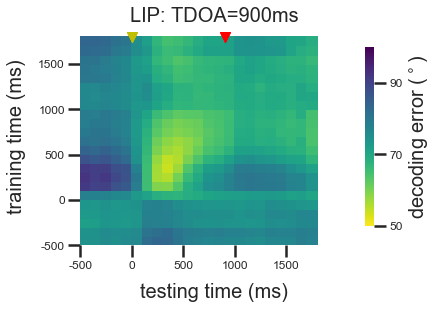

In [20]:
### Subpopulations